In [1]:
source("~/source_all.R")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, r

In [6]:
library(UCSCXenaTools)

In [14]:
library(clusterProfiler)

In [10]:
Sys.setenv("VROOM_CONNECTION_SIZE" = 13107200)

In [373]:
q_thres = 0.1

In [ ]:
pdata[["Study"]] = unlist(pdata[,"_study"])
#Fix names for R
pdata$Status = make.names(pdata$Status)
covar.use=NULL
var.use="Status"
cond1="Normal"
cond2="Primary.Tumor"
threshold=5
#### Independent filtering ####
temp.human = counts
temp.metadata = pdata
thres <- threshold
#Generate DESeq2 object
if(is.null(covar.use)){
    
    dds_obj <- DESeqDataSetFromMatrix(temp.human,
                                            colData = temp.metadata,
                                            design = as.formula(paste("~ 0",var.use,sep="+")))
}else{
    dds_obj <- DESeqDataSetFromMatrix(temp.human,
                                            colData = temp.metadata,
                                            design = as.formula(paste("~ 0",covar.use,var.use,sep="+")))
}
all.medians <- rowMedians(as.matrix(counts(dds_obj)))
#Adding the per group medians here:
counts.split <- split(as.data.frame(t(counts(dds_obj))),as.factor(unlist(colData(dds_obj)[[var.use]])))
medians.group <- lapply(counts.split, function(x) colMedians(as.matrix(x)))
minMedianperGroup <- thres
low.express <- medians.group[[1]] < minMedianperGroup & medians.group[[2]] < minMedianperGroup
dds_obj.fil <- dds_obj[!low.express, ]
dds_obj.fil <- DESeq(dds_obj.fil)
dds_obj.res <- results(dds_obj.fil,contrast = c(var.use,cond1,cond2),tidy=T)
dds_obj.res$qvalue <- qvalue::qvalue(dds_obj.res$pvalue)$qvalue
dds_obj.res <- dds_obj.res[!is.na(dds_obj.res$qvalue),]
print(dim(dds_obj.res))
print(paste("Deregulated:",sum(dds_obj.res$qvalue < q_thres))) #Damn son.
print(paste("Upregulated:",sum(dds_obj.res$qvalue < q_thres & dds_obj.res$log2FoldChange > 0)))
print(paste("Downregulated:",sum(dds_obj.res$qvalue < q_thres & dds_obj.res$log2FoldChange < 0)))

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates



In [18]:
blca_cohort = XenaData %>%
  filter(XenaHostNames == "tcgaHub") 

In [19]:
blca_cohort

XenaHosts,XenaHostNames,XenaCohorts,XenaDatasets,SampleCount,DataSubtype,Label,Type,AnatomicalOrigin,SampleType,Tags,ProbeMap,LongTitle,Citation,Version,Unit,Platform
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
https://tcga.xenahubs.net,tcgaHub,TCGA Ovarian Cancer (OV),TCGA.OV.sampleMap/HumanMethylation27,616,DNA methylation,Methylation27k,genomicMatrix,Ovary,tumor,cancer,probeMap/illuminaMethyl27K_hg18_gpl8490_TCGAlegacy,TCGA ovarian serous cystadenocarcinoma (OV) DNA methylation (HumanMethylation27),NA,2017-09-08,beta value,Illumina Infinium HumanMethylation27
https://tcga.xenahubs.net,tcgaHub,TCGA Ovarian Cancer (OV),TCGA.OV.sampleMap/HumanMethylation450,10,DNA methylation,Methylation450k,genomicMatrix,Ovary,tumor,cancer,probeMap/illuminaMethyl450_hg19_GPL16304_TCGAlegacy,TCGA ovarian serous cystadenocarcinoma (OV) DNA methylation (HumanMethylation450),NA,2017-09-08,beta value,Illumina Infinium HumanMethylation450
https://tcga.xenahubs.net,tcgaHub,TCGA Ovarian Cancer (OV),TCGA.OV.sampleMap/Gistic2_CopyNumber_Gistic2_all_data_by_genes,579,copy number (gene-level),gistic2,genomicMatrix,Ovary,tumor,cancer,NA,TCGA ovarian serous cystadenocarcinoma (OV) copy number gistic2 estimate,NA,2017-09-08,Gistic2 copy number,NA
https://tcga.xenahubs.net,tcgaHub,TCGA Ovarian Cancer (OV),TCGA.OV.sampleMap/OV_clinicalMatrix,630,phenotype,Phenotypes,clinicalMatrix,,,,NA,NA,NA,2019-12-06,NA,NA
https://tcga.xenahubs.net,tcgaHub,TCGA Ovarian Cancer (OV),TCGA.OV.sampleMap/RPPA_RBN,412,protein expression RPPA,RPPA (replicate-base normalization),genomicMatrix,Ovary,tumor,cancer,NA,TCGA ovarian serous cystadenocarcinoma (OV) phospho- or total protein expression by reverse phase protein array (replicate-base normalization),NA,2017-09-08,RBN normalized RPPA value,NA
https://tcga.xenahubs.net,tcgaHub,TCGA Ovarian Cancer (OV),TCGA.OV.sampleMap/HT_HG-U133A,593,gene expression array,AffyU133a,genomicMatrix,Ovary,tumor,cancer,NA,TCGA ovarian serous cystadenocarcinoma (OV) gene expression (AffyU133a array),NA,2017-09-08,log2(affy RMA),AffyU133a
https://tcga.xenahubs.net,tcgaHub,TCGA Ovarian Cancer (OV),TCGA.OV.sampleMap/HiSeqV2_percentile,308,gene expression RNAseq,IlluminaHiSeq percentile UNC,genomicMatrix,Ovary,tumor,cancer,probeMap/hugo_gencode_good_hg19_V24lift37_probemap,TCGA ovarian serous cystadenocarcinoma (OV) gene expression by RNAseq (polyA+ IlluminaHiSeq percentile UNC),NA,2017-10-13,percentile rank,IlluminaHiSeq_RNASeqV2
https://tcga.xenahubs.net,tcgaHub,TCGA Ovarian Cancer (OV),TCGA.OV.sampleMap/HiSeqV2_PANCAN,308,gene expression RNAseq,IlluminaHiSeq pancan normalized,genomicMatrix,Ovary,tumor,cancer,probeMap/hugo_gencode_good_hg19_V24lift37_probemap,"TCGA ovarian serous cystadenocarcinoma (OV) gene expression by RNAseq (ployA+ IlluminaHiSeq), pancan normalized",NA,2017-10-13,pan-cancer normalized log2(norm_count+1),IlluminaHiSeq_RNASeqV2
https://tcga.xenahubs.net,tcgaHub,TCGA Ovarian Cancer (OV),TCGA.OV.sampleMap/HiSeqV2,308,gene expression RNAseq,IlluminaHiSeq UNC,genomicMatrix,Ovary,tumor,cancer,probeMap/hugo_gencode_good_hg19_V24lift37_probemap,TCGA ovarian serous cystadenocarcinoma (OV) gene expression by RNAseq (polyA+ IlluminaHiSeq UNC),NA,2017-10-13,log2(norm_count+1),IlluminaHiSeq_RNASeqV2


In [37]:
blca_cohort = XenaData %>%
  filter(XenaHostNames == "tcgaHub") %>% # select TCGA Hub
  XenaScan("TCGA Bladder Cancer")   # select BLCA cohort


In [38]:
blca_cohort

XenaHosts,XenaHostNames,XenaCohorts,XenaDatasets,SampleCount,DataSubtype,Label,Type,AnatomicalOrigin,SampleType,Tags,ProbeMap,LongTitle,Citation,Version,Unit,Platform
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
https://tcga.xenahubs.net,tcgaHub,TCGA Bladder Cancer (BLCA),RABIT/separate_processed/RABIT_BLCA.HiSeq.V2,223,pathway activity,"RABIT transcription factor regulatory impact, HiSeqV2",clinicalMatrix,,,,NA,NA,Proc Natl Acad Sci U S A. 2015,NA,RABIT score,NA
https://tcga.xenahubs.net,tcgaHub,TCGA Bladder Cancer (BLCA),RABIT/separate_processed/RABIT_BLCA.HiSeq,46,pathway activity,"RABIT transcription factor regulatory impact, HiSeq",clinicalMatrix,,,,NA,NA,Proc Natl Acad Sci U S A. 2015,NA,RABIT score,NA
https://tcga.xenahubs.net,tcgaHub,TCGA Bladder Cancer (BLCA),TCGA.BLCA.sampleMap/HumanMethylation450,434,DNA methylation,Methylation450k,genomicMatrix,Bladder,tumor,cancer,probeMap/illuminaMethyl450_hg19_GPL16304_TCGAlegacy,TCGA bladder urothelial carcinoma (BLCA) DNA methylation (HumanMethylation450),NA,2017-09-08,beta value,Illumina Infinium HumanMethylation450
https://tcga.xenahubs.net,tcgaHub,TCGA Bladder Cancer (BLCA),TCGA.BLCA.sampleMap/Gistic2_CopyNumber_Gistic2_all_data_by_genes,408,copy number (gene-level),gistic2,genomicMatrix,Bladder,tumor,cancer,NA,TCGA bladder urothelial carcinoma (BLCA) copy number gistic2 estimate,NA,2017-09-08,Gistic2 copy number,NA
https://tcga.xenahubs.net,tcgaHub,TCGA Bladder Cancer (BLCA),TCGA.BLCA.sampleMap/RPPA_RBN,127,protein expression RPPA,RPPA (replicate-base normalization),genomicMatrix,Bladder,tumor,cancer,NA,TCGA bladder urothelial carcinoma (BLCA) phospho- or total protein expression by reverse phase protein array (replicate-base normalization),NA,2017-09-08,RBN normalized RPPA value,NA
https://tcga.xenahubs.net,tcgaHub,TCGA Bladder Cancer (BLCA),TCGA.BLCA.sampleMap/HiSeqV2_percentile,426,gene expression RNAseq,IlluminaHiSeq percentile,genomicMatrix,Bladder,tumor,cancer,probeMap/hugo_gencode_good_hg19_V24lift37_probemap,TCGA bladder urothelial carcinoma (BLCA) gene expression by RNAseq (polyA+ IlluminaHiSeq percentile),NA,2017-10-13,percentile rank,IlluminaHiSeq_RNASeqV2
https://tcga.xenahubs.net,tcgaHub,TCGA Bladder Cancer (BLCA),TCGA.BLCA.sampleMap/miRNA_GA_gene,2,miRNA mature strand expression RNAseq,IlluminaGA,genomicMatrix,Bladder,tumor,cancer,NA,TCGA bladder urothelial carcinoma (BLCA) miRNA mature strand expression by RNAseq (IlluminaGA),NA,2017-09-08,log2(RPM+1),IlluminaGA_miRNASeq
https://tcga.xenahubs.net,tcgaHub,TCGA Bladder Cancer (BLCA),TCGA.BLCA.sampleMap/HiSeqV2_PANCAN,426,gene expression RNAseq,IlluminaHiSeq pancan normalized,genomicMatrix,Bladder,tumor,cancer,probeMap/hugo_gencode_good_hg19_V24lift37_probemap,"TCGA bladder urothelial carcinoma (BLCA) gene expression by RNAseq (ployA+ IlluminaHiSeq), pancan normalized",NA,2017-10-13,pan-cancer normalized log2(norm_count+1),IlluminaHiSeq_RNASeqV2
https://tcga.xenahubs.net,tcgaHub,TCGA Bladder Cancer (BLCA),TCGA.BLCA.sampleMap/HiSeqV2,426,gene expression RNAseq,IlluminaHiSeq,genomicMatrix,Bladder,tumor,cancer,probeMap/hugo_gencode_good_hg19_V24lift37_probemap,TCGA bladder urothelial carcinoma (BLCA) gene expression by RNAseq (polyA+ IlluminaHiSeq),NA,2017-10-13,log2(norm_count+1),IlluminaHiSeq_RNASeqV2


In [40]:

cli_query = blca_cohort %>%
  filter(DataSubtype == "phenotype") %>%  # select clinical dataset
  XenaGenerate() %>%  # generate a XenaHub object
  XenaQuery() %>%
  XenaDownload()

cli = XenaPrepare(cli_query)

This will check url status, please be patient.

All downloaded files will under directory /tmp/Rtmp33bVJq.

The 'trans_slash' option is FALSE, keep same directory structure as Xena.

Creating directories for datasets...





In [43]:
survival_time = cli$BLCA_survival.txt

In [45]:
head(survival_time)

sample,_PATIENT,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
TCGA-2F-A9KO-01,TCGA-2F-A9KO,1,734,1,734,NA,NA,1,651,NA
TCGA-2F-A9KP-01,TCGA-2F-A9KP,1,364,1,364,NA,NA,1,343,NA
TCGA-2F-A9KQ-01,TCGA-2F-A9KQ,0,2886,0,2886,0,2886,0,2886,NA
TCGA-2F-A9KR-01,TCGA-2F-A9KR,1,3183,1,3183,1,3086,1,3086,NA
TCGA-2F-A9KT-01,TCGA-2F-A9KT,0,3314,0,3314,0,3314,0,3314,NA
TCGA-2F-A9KW-01,TCGA-2F-A9KW,1,254,1,254,NA,NA,1,85,NA


In [93]:
pdata$OS.time = survival_time$OS.time[match(pdata$sample, survival_time$sample)]

In [94]:
pdata$OS.status = survival_time$OS[match(pdata$sample, survival_time$sample)]

In [47]:
pdata$PFI.time = survival_time$PFI.time[match(pdata$sample, survival_time$sample)]

In [73]:
pdata$PFI.status = survival_time$PFI[match(pdata$sample, survival_time$sample)]

In [268]:
pdata$DSS.time = survival_time$DSS.time[match(pdata$sample, survival_time$sample)]

In [269]:
pdata$DSS.status = survival_time$DSS[match(pdata$sample, survival_time$sample)]

In [270]:
all(colnames(counts) == pdata$sample)

[1] TRUE

In [375]:
genes=c("S100A8", "SPP1", "IFI6", "SELENOP", "CTC1")
signs = c("+","+","+","-","-")

In [327]:
ranks = apply(counts,2,rank)

In [442]:
norm_counts = log2(counts(dds_obj.fil,normalized=T))

In [443]:
res = sapply(seq(1, length(genes)), function(x){
    y = norm_counts[genes[x],]
    if(signs[x] == "+"){
        return(y)
    }else{
        return(-1*y)
    }
    },simplify=F)

In [444]:
sig_score = apply(do.call(rbind,res),2,mean)

In [445]:
sig_score = sig_score

In [446]:
thres = 0.5

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”


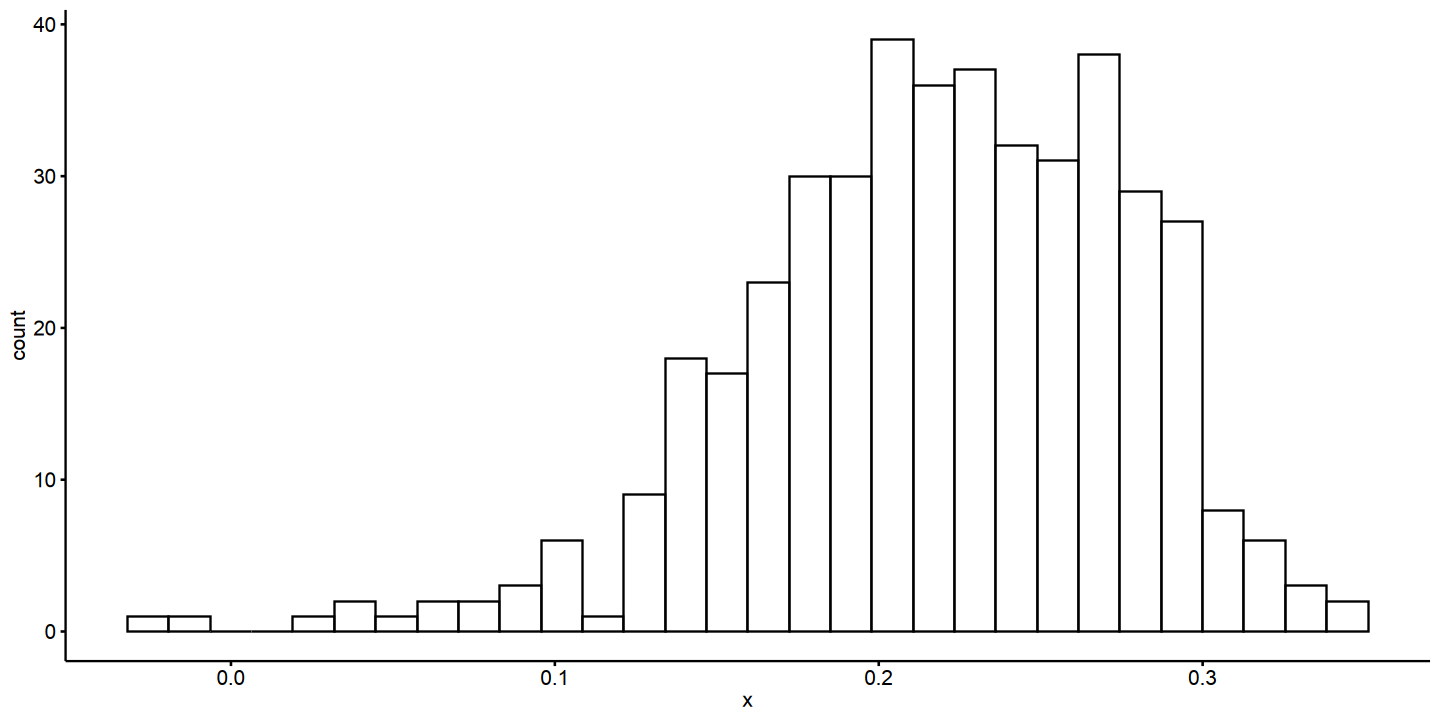

In [447]:
gghistogram(sig_score)

In [448]:
quant1 = quantile(sig_score,thres)
quant2 = quantile(sig_score,1-thres)

In [449]:
quant1 = quantile(sig_score,thres)
quant2 = quantile(sig_score,1-thres)
low = sig_score[sig_score > quant2]
low = names(low)
high = sig_score[sig_score < quant1]
high = names(high)

In [450]:
library(survival)
library(survminer)

In [451]:
df = data.frame(PFI=pdata$PFI.time,Status=pdata$PFI.status, Signature = sig_score)

In [452]:
df = df[complete.cases(df),]

In [453]:
df

,PFI,Status,Signature
,<dbl>,<dbl>,<dbl>
TCGA-CU-A0YR-11,219,1,0.09194191
TCGA-BT-A20Q-11,593,1,0.04368262
TCGA-BT-A20N-11,795,1,0.17541701
TCGA-BT-A20W-11,254,0,0.18701344
TCGA-GC-A3BM-11,651,1,0.16868846
TCGA-BL-A13J-11,81,1,0.12936227
TCGA-CU-A0YN-11,393,0,0.10303700
TCGA-K4-A54R-11,842,0,0.14093664
TCGA-BT-A2LA-11,522,0,0.16473415


In [454]:
fit = coxph(Surv(PFI, Status) ~ Signature, data = df)
fit

Call:
coxph(formula = Surv(PFI, Status) ~ Signature, data = df)

           coef exp(coef) se(coef)     z     p
Signature 1.618     5.042    1.278 1.266 0.205

Likelihood ratio test=1.64  on 1 df, p=0.1999
n= 426, number of events= 181 

In [455]:
df$Group = "None"
df[low,"Group"] = "Low"
df[high,"Group"] = "High"
df2 = df[complete.cases(df),]
df2 = df2[!(df2$Group == "None"),]

In [456]:
fit = survfit(Surv(PFI, Status) ~ Group, data = df2)

In [457]:
fit

Call: survfit(formula = Surv(PFI, Status) ~ Group, data = df2)

             n events median 0.95LCL 0.95UCL
Group=High 208     79    917     651      NA
Group=Low  217    102    795     596    1679

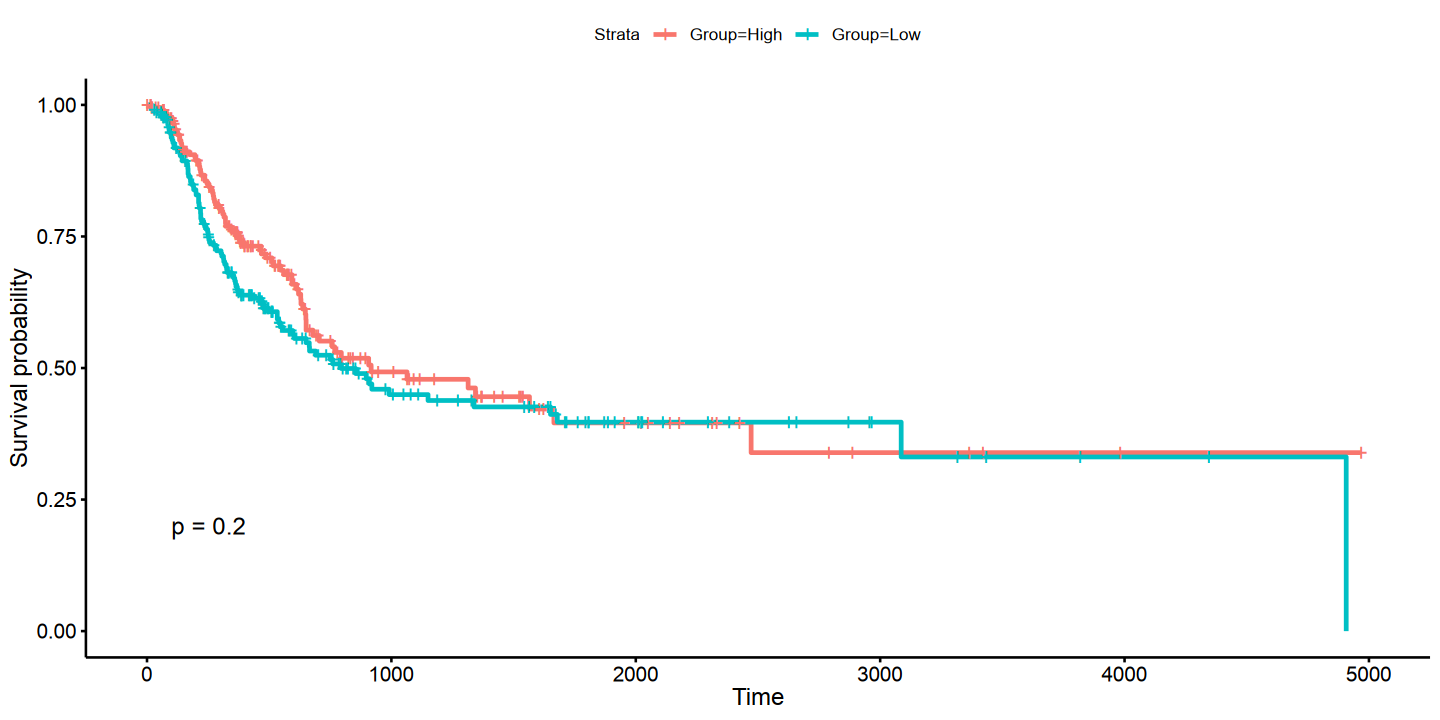

In [458]:
ggsurvplot(fit, pval = TRUE)

In [459]:
df = data.frame(OS=pdata$OS.time,Status=pdata$OS.status, Signature = sig_score)

In [460]:
fit = coxph(Surv(OS, Status) ~ Signature, data = df)
fit

Call:
coxph(formula = Surv(OS, Status) ~ Signature, data = df)

           coef exp(coef) se(coef)     z     p
Signature 1.938     6.944    1.262 1.536 0.125

Likelihood ratio test=2.43  on 1 df, p=0.119
n= 425, number of events= 188 
   (10 observations deleted due to missingness)

In [461]:
df$Group = "None"
df[low,"Group"] = "Low"
df[high,"Group"] = "High"
df2 = df[complete.cases(df),]
df2 = df2[!(df2$Group == "None"),]

In [462]:
fit = survfit(Surv(OS, Status) ~ Group, data = df2)

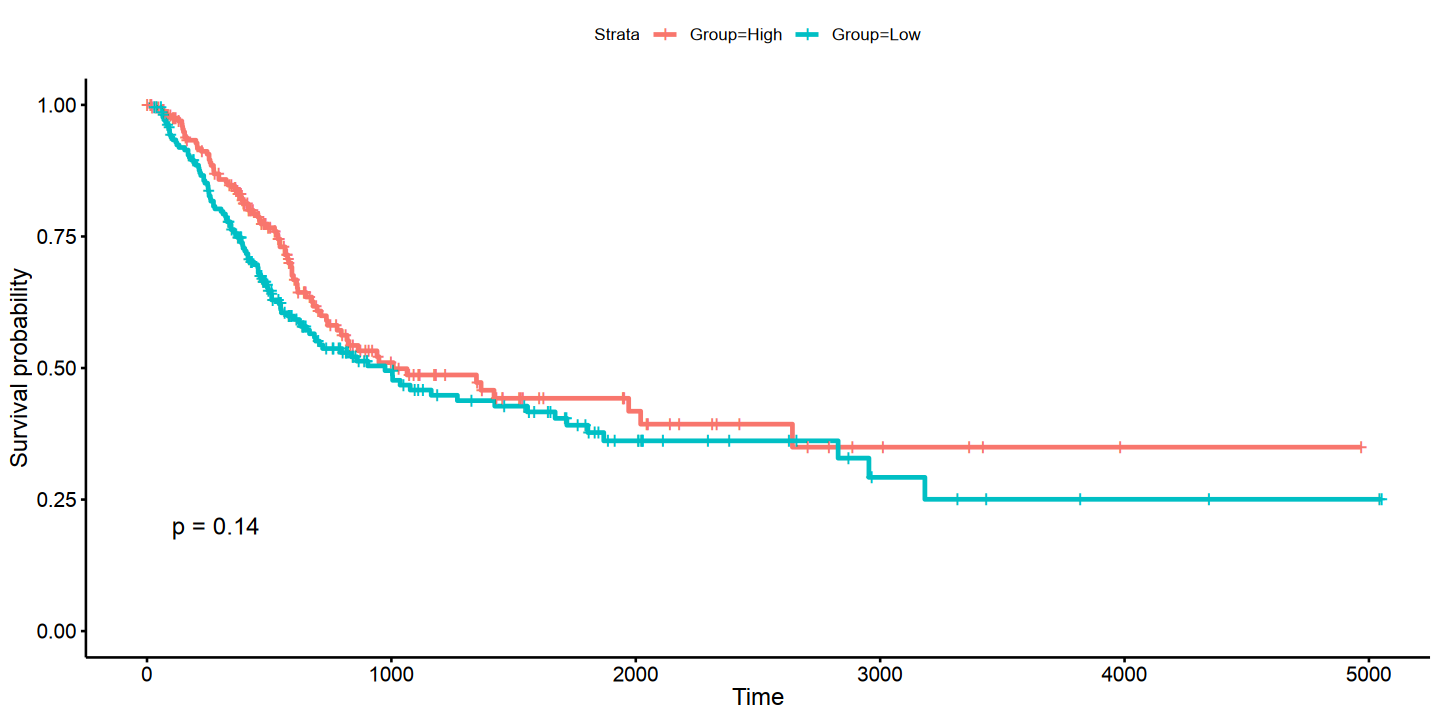

In [463]:
ggsurvplot(fit, pval = TRUE)

In [464]:
df = data.frame(OS=pdata$DSS.time,Status=pdata$DSS.status, Signature = sig_score)

In [465]:
fit = coxph(Surv(OS, Status) ~ Signature, data = df)
fit

Call:
coxph(formula = Surv(OS, Status) ~ Signature, data = df)

            coef exp(coef) se(coef)     z      p
Signature  2.698    14.847    1.559 1.731 0.0835

Likelihood ratio test=3.12  on 1 df, p=0.07728
n= 410, number of events= 127 
   (25 observations deleted due to missingness)

In [466]:
df$Group = "None"
df[low,"Group"] = "Low"
df[high,"Group"] = "High"
df2 = df[complete.cases(df),]
df2 = df2[!(df2$Group == "None"),]

In [467]:
fit = survfit(Surv(OS, Status) ~ Group, data = df2)

In [469]:
p = ggsurvplot(fit, pval = TRUE)

In [473]:
str(p)

List of 3
 $ plot          :List of 11
  ..$ data       :'data.frame':	378 obs. of  10 variables:
  .. ..$ time    : num [1:378] 0 0 0 13 15 17 19 20 35 46 ...
  .. ..$ n.risk  : num [1:378] 199 210 199 198 197 196 195 194 193 192 ...
  .. ..$ n.event : num [1:378] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..$ n.censor: num [1:378] 0 0 1 1 1 1 1 1 1 1 ...
  .. ..$ surv    : num [1:378] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ std.err : num [1:378] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..$ upper   : num [1:378] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ lower   : num [1:378] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ strata  : Factor w/ 2 levels "Group=High","Group=Low": 1 2 1 1 1 1 1 1 1 1 ...
  .. ..$ Group   : Factor w/ 2 levels "High","Low": 1 2 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "table")='data.frame':	2 obs. of  9 variables:
  .. .. ..$ records  : num [1:2] 199 210
  .. .. ..$ n.max    : num [1:2] 199 210
  .. .. ..$ n.start  : num [1:2] 199 210
  .. .. ..$ events   : num [1:2] 51 76
  .. .. ..$ rmean    : num [1:2] 2987 2610
  

In [474]:
ggsave("Carvalho_survplot.svg", p[[1]], units="in", width=8,height=8, dpi=300)

In [475]:
system("rclone copy --progress Carvalho_survplot.svg Drive:Carvalho_SVGs")